# Loading the model

In [1]:
from keras.models import load_model
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.load_weights('/home/arpitm/Documents/CAPTCHA DETECTOR/model.h5')

model = loaded_model


print('Model successfully loaded')


import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
image_address=""

characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
def predict(image_address):

 
    image = cv2.imread(image_address)
    height, width, depth = image.shape

    
    image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)
  
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)



    ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)


   
    kernel = np.ones((5,5), np.uint8)
    img_dilation = cv2.dilate(thresh, kernel, iterations=1)

    gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)
    ctrs, hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    m = list()
   
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    pchl = list()
    dp = image.copy()
    for i, ctr in enumerate(sorted_ctrs):
       
        x, y, w, h = cv2.boundingRect(ctr)
        cv2.rectangle(dp,(x-10,y-10),( x + w + 10, y + h + 10 ),(90,0,255),9)
        
    plt.imshow(dp)


    for i, ctr in enumerate(sorted_ctrs):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)
        
        if w / h > 1.25:
            
            half_width = int(w / 2)
            w=half_width
        
            r=10
        
            if(y<10 and x <10 ):
                r=0


            roi = image[y-r:y+h+10, x-r:x+w+10]
            roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
            roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
            
            roi = np.array(roi)
            t = np.copy(roi)
            t = t / 255.0
            t = 1-t
            t = t.reshape(1,784)
            m.append(roi)
            pred = model.predict_classes(t)
            pchl.append(pred)


            x=x+half_width
            r=10
        
            if(y<10 and x <10 ):
                r=0


            roi = image[y-r:y+h+10, x-r:x+w+10]

            
            roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
            roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
            
            roi = np.array(roi)
            t = np.copy(roi)
            t = t / 255.0
            t = 1-t
            t = t.reshape(1,784)
            m.append(roi)
            pred = model.predict_classes(t)
            pchl.append(pred)

        
        
        
        
        
        
        else:
            r=10
        
            if(y<10 or x <10 ):
                r=5


            roi = image[y-10:y+h+15, x-r:x+w+10]
            roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
            roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
            
            roi = np.array(roi)
            t = np.copy(roi)
            t = t / 255.0
            t = 1-t
            t = t.reshape(1,784)
            m.append(roi)
            pred = model.predict_classes(t)
            pchl.append(pred)

        

    pcw = list()
    interp = 'bilinear'
    fig, axs = plt.subplots(nrows=len(sorted_ctrs), sharex=True, figsize=(1,len(sorted_ctrs)))
    for i in range(len(pchl)):
        #print (pchl[i][0])
        pcw.append(characters[pchl[i][0]])
        axs[i].set_title('-------> predicted letter: '+characters[pchl[i][0]], x=2.5,y=0.24)
        axs[i].imshow(m[i], interpolation=interp)

    plt.show()


    predstring = ''.join(pcw)
    
    return predstring




Using TensorFlow backend.

Model successfully loaded


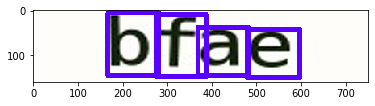

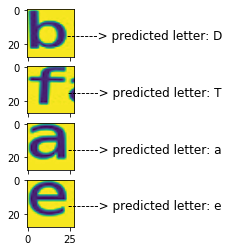

'DTae'

In [2]:
image_address="/home/arpitm/Documents/CAPTCHA DETECTOR/Images/3.jpg"
predict(image_address)